In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [8]:
url='https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/BaskinRobbinsCluster.csv'
df=pd.read_csv(url)
df.sample(10)

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),cluster
30,Lunar Cheesecake,180,11.0,0.4,18,13,3.0,0
9,Cherries Jubilee,220,11.0,0.4,26,19,4.0,1
39,Nutty Coconut,280,19.0,0.4,23,17,6.0,1
7,Caramel Praline Cheesecake,170,8.0,0.2,21,17,3.0,0
28,Jamoca Almond Fudge,260,15.0,0.4,28,20,5.0,1
42,Peanut Butter ‘n Chocolate,290,20.0,0.4,24,17,7.0,1
6,Brownie Sundae(No Sugar Added),120,5.0,0.1,21,4,3.0,0
15,Chocolate Hazelnut Truffle,280,17.0,0.4,29,20,5.0,1
52,Red Velvet,160,9.0,0.3,18,15,3.0,0
62,Vanilla,220,14.0,0.5,20,16,5.0,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flavour            70 non-null     object 
 1   Calories           70 non-null     int64  
 2   Total Fat (g)      70 non-null     float64
 3   Trans Fat (g)      70 non-null     float64
 4   Carbohydrates (g)  70 non-null     int64  
 5   Sugars (g)         70 non-null     int64  
 6   Protein (g)        70 non-null     float64
 7   cluster            70 non-null     int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 4.5+ KB


In [10]:
df.columns

Index(['Flavour', 'Calories', 'Total Fat (g)', 'Trans Fat (g)',
       'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)', 'cluster'],
      dtype='object')

In [11]:
cols=['Calories', 'Total Fat (g)', 'Trans Fat (g)',
       'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)']

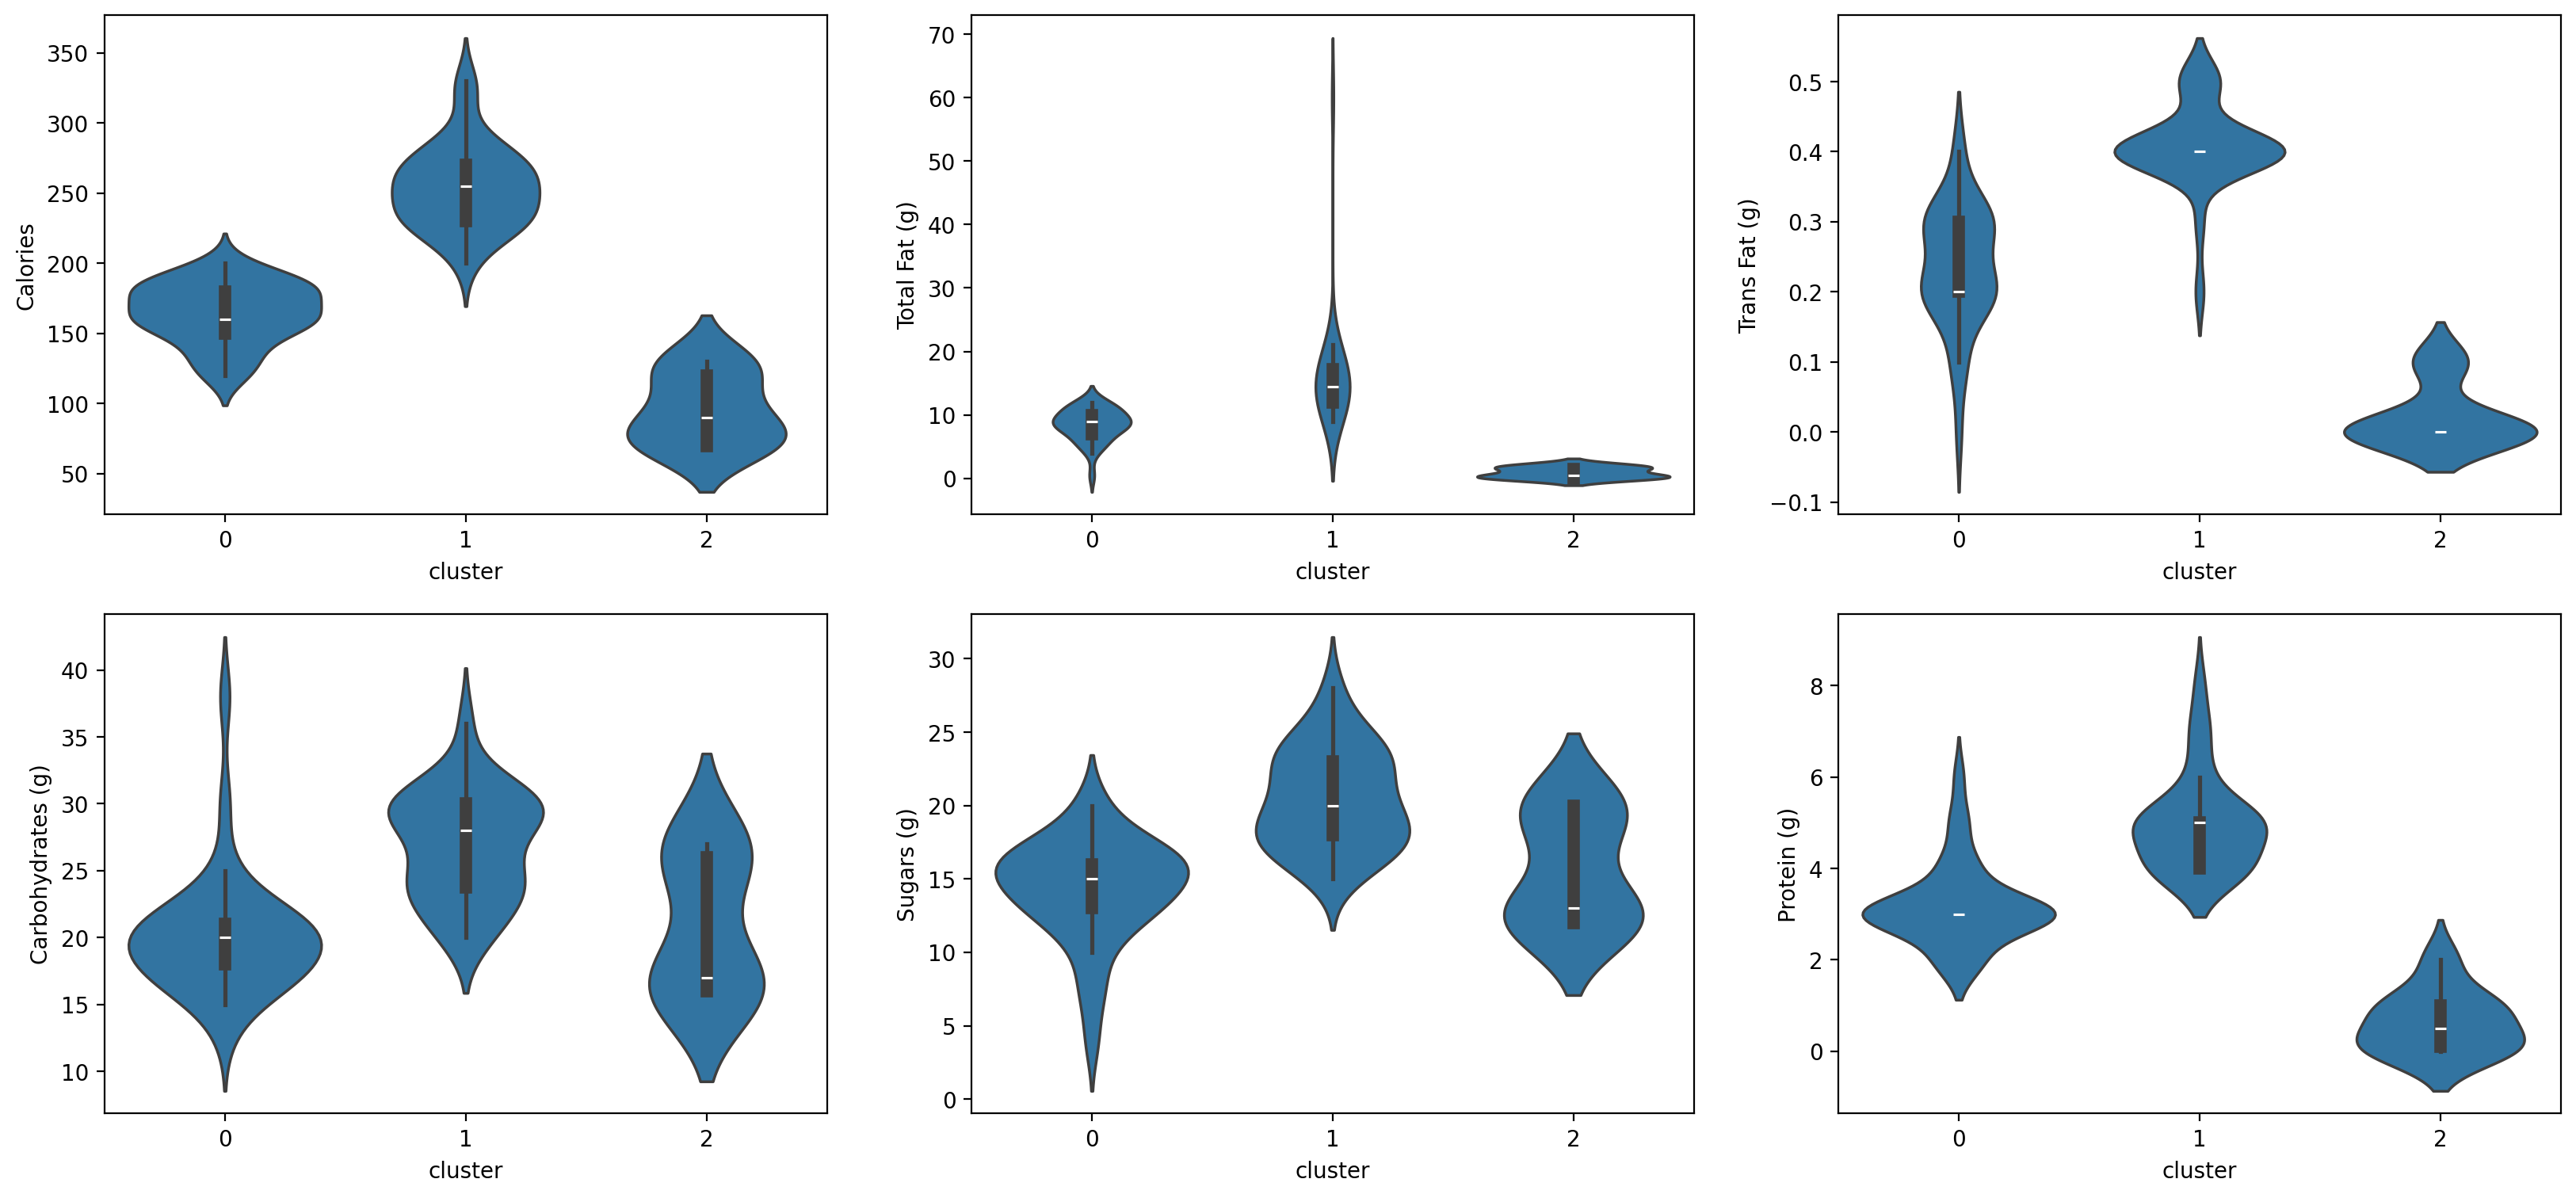

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 9))
ax = ax.ravel()
for i, col in enumerate(cols):
    sns.violinplot(x='cluster', y=col, data=df,ax=ax[i])

#### Draw decision tree

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [15]:
df.columns

Index(['Flavour', 'Calories', 'Total Fat (g)', 'Trans Fat (g)',
       'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)', 'cluster'],
      dtype='object')

In [16]:
cols=['Calories', 'Total Fat (g)', 'Trans Fat (g)',
       'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)']

In [17]:
X=df[cols] # fearure
y=df['cluster'] # label

In [18]:
test_size=.2
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=test_size,
                                                    stratify=y,
                                                    random_state=7)

In [19]:
model=DecisionTreeClassifier(criterion='gini') # gini is a default
# model=DecisionTreeClassifier(criterion='entropy')

model.fit(X_train, y_train)

DecisionTreeClassifier()

In [20]:
X_train.columns

Index(['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Carbohydrates (g)',
       'Sugars (g)', 'Protein (g)'],
      dtype='object')

In [21]:
model.feature_importances_

array([0.67178694, 0.27614079, 0.        , 0.        , 0.        ,
       0.05207226])

In [25]:
fs=pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
fs

Calories             0.671787
Total Fat (g)        0.276141
Protein (g)          0.052072
Trans Fat (g)        0.000000
Carbohydrates (g)    0.000000
Sugars (g)           0.000000
dtype: float64

In [24]:
y_train.value_counts()

cluster
0    26
1    23
2     7
Name: count, dtype: int64

In [30]:
! pip install pydotplus

     ---------------------------------------- 0.0/278.7 kB ? eta -:--:--
     ---- ---------------------------------- 30.7/278.7 kB 1.4 MB/s eta 0:00:01
     -------- ---------------------------- 61.4/278.7 kB 825.8 kB/s eta 0:00:01
     ------------ ------------------------ 92.2/278.7 kB 880.9 kB/s eta 0:00:01
     -------------------- ----------------- 153.6/278.7 kB 1.0 MB/s eta 0:00:01
     -------------------------------- ----- 235.5/278.7 kB 1.2 MB/s eta 0:00:01
     -------------------------------------- 278.7/278.7 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24577 sha256=cb5b0e2cc15166d1e381825fd98563fa3c4534828a9a41086ec5b72f6f584154
  Stored in directory: c:\users\1000259375\appdata\local\pip\cache\wheels\69\b2\67\08f0eef649af92df772c09f451558298e07fab1bc7cdf33db0
Successfully built pydotplus



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
from six import StringIO
# from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

In [ ]:
# dot_data = StringIO()
# export_graphviz(model, out_file=dot_data,
#                 feature_names=cols,
#                 class_names=['light', 'rich', 'std'],
#                 filled=True, rounded=True,
#                 special_characters=True)

# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# Image(graph.create_png())

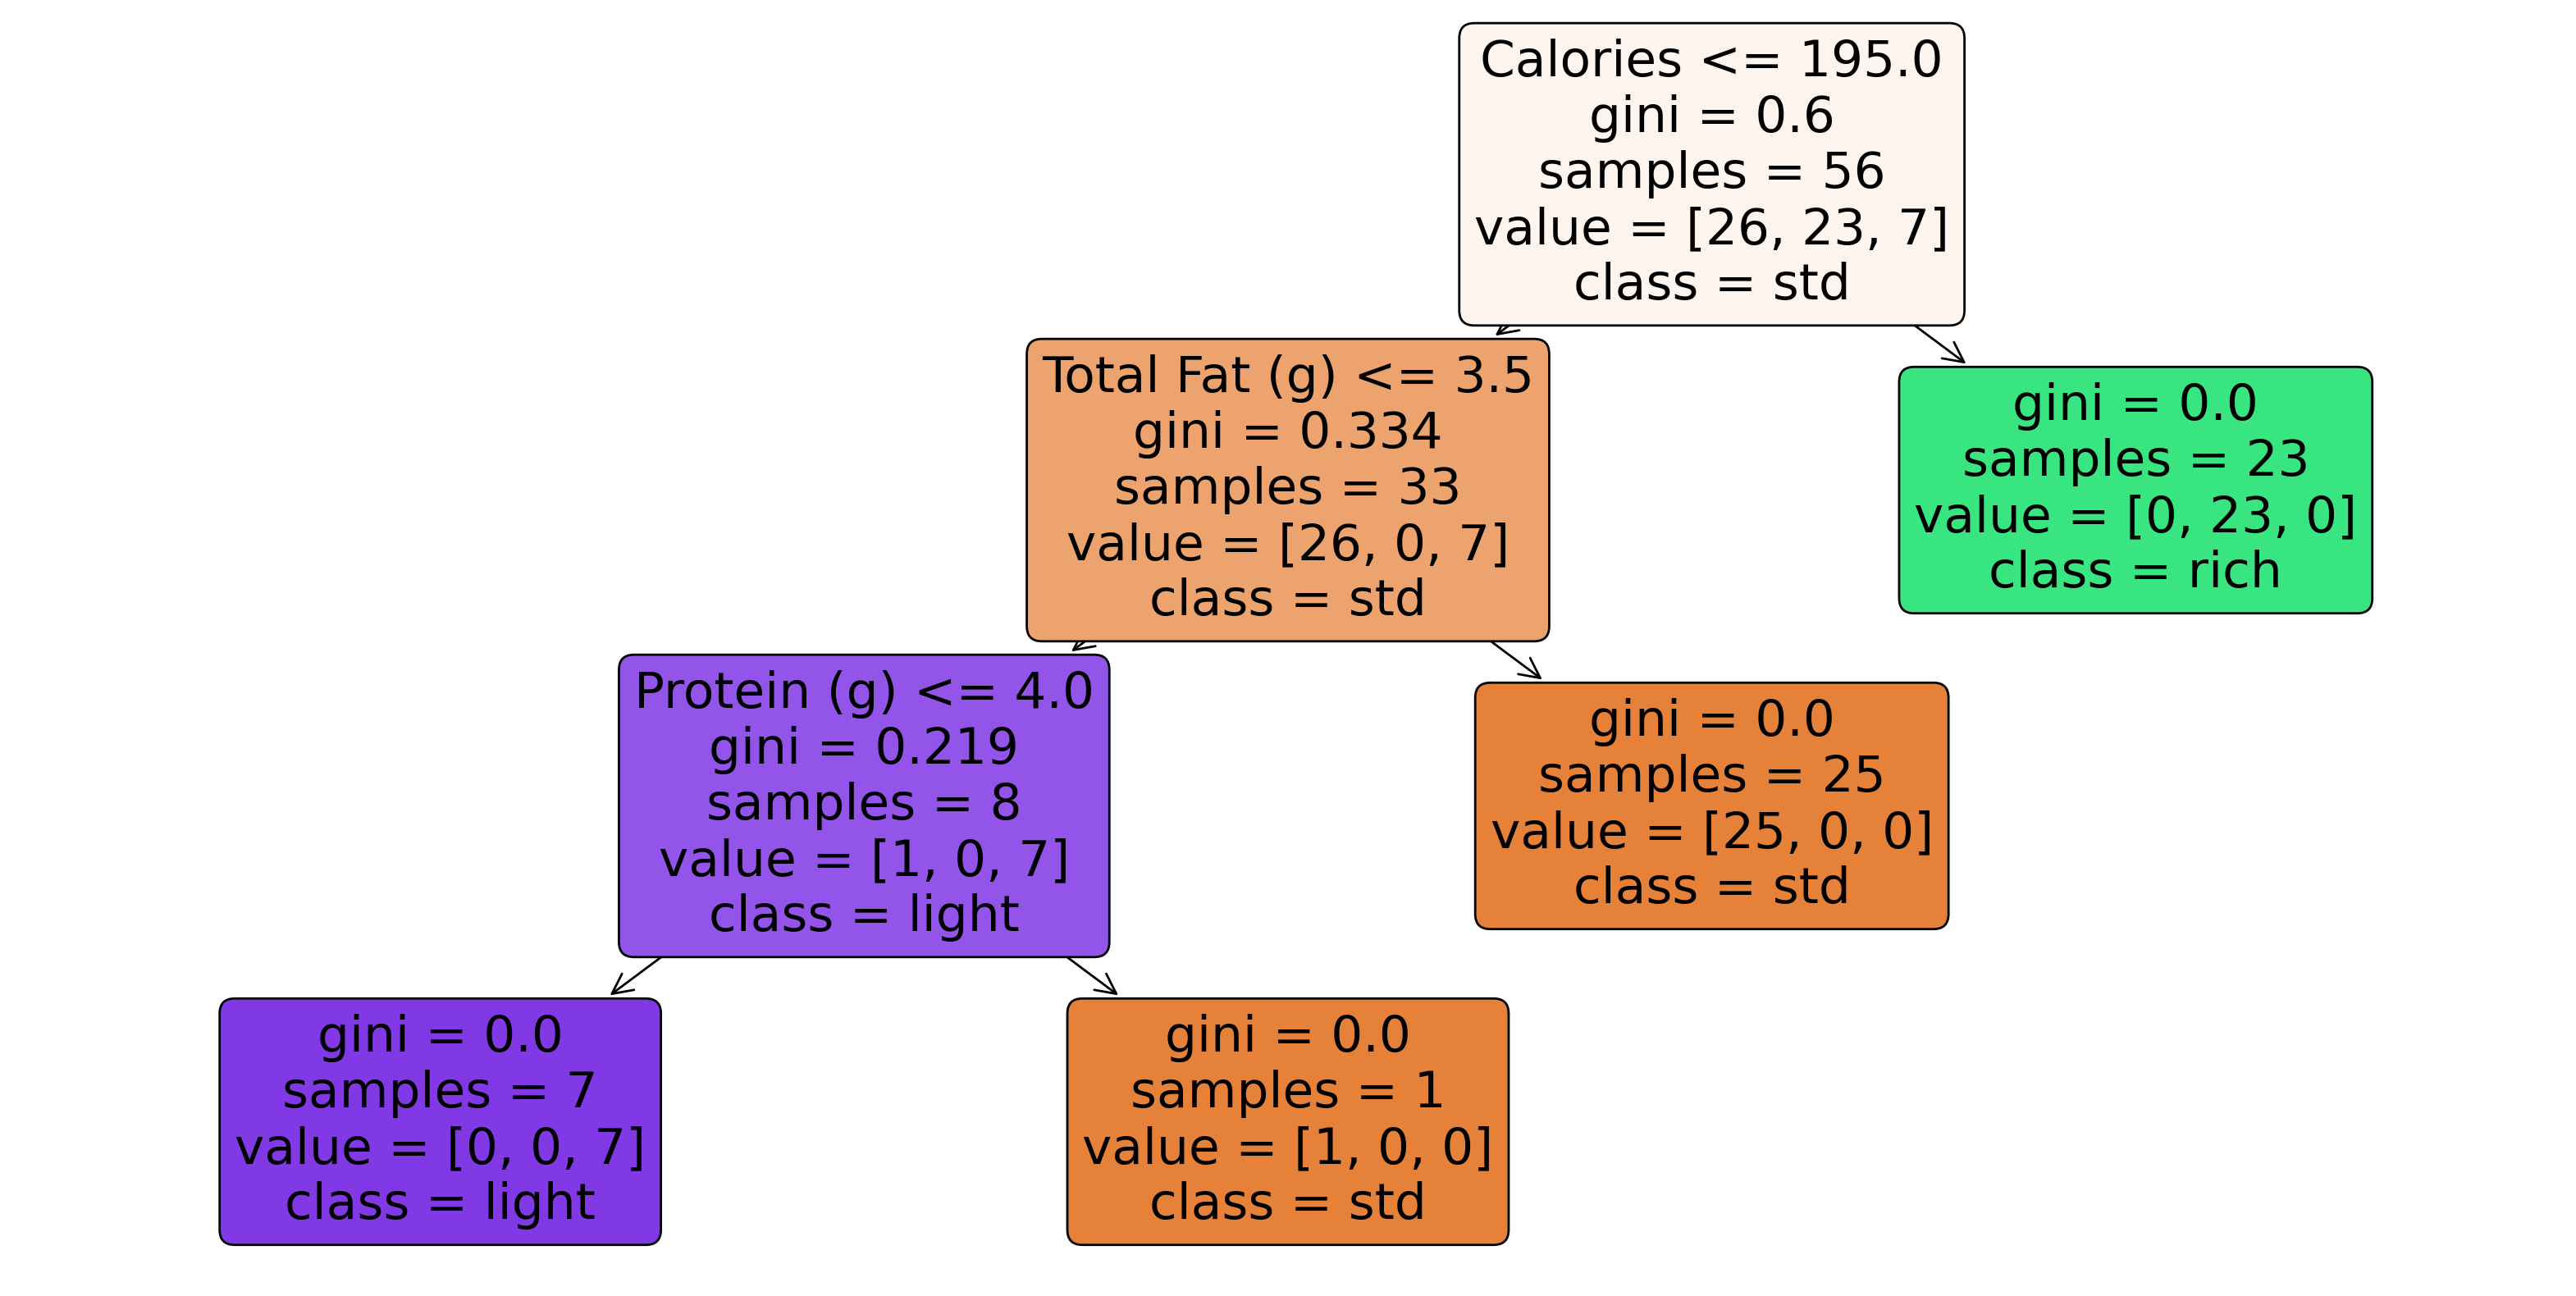

In [40]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
plot_tree(model, feature_names=cols, class_names=['std', 'rich', 'light'], filled=True, rounded=True)
plt.show()

In [41]:
model.tree_.impurity # gini

array([0.60012755, 0.33425161, 0.21875   , 0.        , 0.        ,
       0.        , 0.        ])

In [42]:
model.tree_.value

array([[[0.46428571, 0.41071429, 0.125     ]],

       [[0.78787879, 0.        , 0.21212121]],

       [[0.125     , 0.        , 0.875     ]],

       [[0.        , 0.        , 1.        ]],

       [[1.        , 0.        , 0.        ]],

       [[1.        , 0.        , 0.        ]],

       [[0.        , 1.        , 0.        ]]])

#### 3D plot

In [ ]:
! pip install PyQt5

In [44]:
from mpl_toolkits.mplot3d import Axes3D

In [71]:
# switch to interactive matplotlib

%matplotlib qt5
%pylab qt

# switch back to inline mode
# %matplotlib inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
colors = y.map({'light':'green', 'std':'blue', 'rich':'purple'})
ax.scatter(X['Calories'], X['Total Fat (g)'], X['Protein (g)'], alpha=.5, c=colors)
ax.set_xlabel('Calories')
ax.set_ylabel('Total Fat (g)')
ax.set_zlabel('Protein (g)')

Text(0.5, 0, 'Protein (g)')

Text(0.5, 0, 'Protein (g)')

Text(0.5, 0, 'Protein (g)')

In [73]:
predicted = model.predict(X_test)
predicted

array([0, 0, 1, 2, 1, 0, 0, 1, 1, 1, 1, 2, 0, 0], dtype=int64)

In [74]:
pd.crosstab(y_test, predicted)

col_0,0,1,2
cluster,,,
0,6,1,0
1,0,5,0
2,0,0,2
